In [1]:
import os  
if not os.path.isfile('vgg19_normalized.pkl'):
    # get weight bias parameter
    !wget https://s3.amazonaws.com/lasagne/recipes/pretrained/imagenet/vgg19_normalized.pkl

In [2]:
from __future__ import print_function

import numpy
import theano
import theano.tensor as T

from Project_nn import LeNetConvPoolLayer

import random
import numpy as np
import scipy

Using gpu device 0: GRID K520 (CNMeM is disabled, cuDNN Version is too old. Update to v5, was 3007.)
/home/ubuntu/miniconda2/envs/theano/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [3]:
IMAGE_W = 160

In [4]:
# start-snippet-1
x = T.matrix('x')
rng = np.random.RandomState(1234)

######################
# BUILD ACTUAL MODEL #
######################
print('... building the model')

layer0_input = x.reshape((1, 3, IMAGE_W, IMAGE_W))

# stage 1
layer0 = LeNetConvPoolLayer(
    rng,
    input=layer0_input,
    image_shape=(1, 3, IMAGE_W, IMAGE_W), # (input batch size, number of input feature, heightm, width)
    filter_shape=(64, 3, 3, 3),  # (number of output feature maps, number of input feature maps, height, width)
    poolsize=(1, 1)
)

layer1 = LeNetConvPoolLayer(
    rng,
    input=layer0.output,
    image_shape=(1, 64, IMAGE_W, IMAGE_W),
    filter_shape=(64, 64, 3, 3),  
    poolsize=(2, 2)
)

# stage 2
layer2 = LeNetConvPoolLayer(
    rng,
    input=layer1.output,
    image_shape=(1, 64, IMAGE_W/2, IMAGE_W/2), # (input batch size, number of input feature, heightm, width)
    filter_shape=(128, 64, 3, 3),    # (number of output feature maps, number of input feature maps, height, width)
    poolsize=(1, 1)
)

layer3 = LeNetConvPoolLayer(
    rng,
    input=layer2.output,
    image_shape=(1, 128, IMAGE_W/2, IMAGE_W/2),
    filter_shape=(128, 128, 3, 3),  
    poolsize=(2, 2)
)

# stage 3
layer4 = LeNetConvPoolLayer(
    rng,
    input=layer3.output,
    image_shape=(1, 128, IMAGE_W/4, IMAGE_W/4), # (input batch size, number of input feature, heightm, width)
    filter_shape=(256, 128, 3, 3),   # (number of output feature maps, number of input feature maps, height, width)
    poolsize=(1, 1)
)

layer5 = LeNetConvPoolLayer(
    rng,
    input=layer4.output,
    image_shape=(1, 256, IMAGE_W/4, IMAGE_W/4),
    filter_shape=(256, 256, 3, 3),  
    poolsize=(1, 1)
)

layer6 = LeNetConvPoolLayer(
    rng,
    input=layer5.output,
    image_shape=(1, 256, IMAGE_W/4, IMAGE_W/4), # (input batch size, number of input feature, heightm, width)
    filter_shape=(256, 256, 3, 3),   # (number of output feature maps, number of input feature maps, height, width)
    poolsize=(1, 1)
)

layer7 = LeNetConvPoolLayer(
    rng,
    input=layer6.output,
    image_shape=(1, 256, IMAGE_W/4, IMAGE_W/4),
    filter_shape=(256, 256, 3, 3),  
    poolsize=(2, 2)
)

# stage 4
layer8 = LeNetConvPoolLayer(
    rng,
    input=layer7.output,
    image_shape=(1, 256, IMAGE_W/8, IMAGE_W/8), # (input batch size, number of input feature, heightm, width)
    filter_shape=(512, 256, 3, 3),   # (number of output feature maps, number of input feature maps, height, width)
    poolsize=(1, 1)
)

layer9 = LeNetConvPoolLayer(
    rng,
    input=layer8.output,
    image_shape=(1, 512, IMAGE_W/8, IMAGE_W/8), # (input batch size, number of input feature, heightm, width)
    filter_shape=(512, 512, 3, 3),   # (number of output feature maps, number of input feature maps, height, width)
    poolsize=(1, 1)
)

layer10 = LeNetConvPoolLayer(
    rng,
    input=layer9.output,
    image_shape=(1, 512, IMAGE_W/8, IMAGE_W/8), # (input batch size, number of input feature, heightm, width)
    filter_shape=(512, 512, 3, 3),   # (number of output feature maps, number of input feature maps, height, width)
    poolsize=(1, 1)
)

layer11 = LeNetConvPoolLayer(
    rng,
    input=layer10.output,
    image_shape=(1, 512, IMAGE_W/8, IMAGE_W/8), # (input batch size, number of input feature, heightm, width)
    filter_shape=(512, 512, 3, 3),   # (number of output feature maps, number of input feature maps, height, width)
    poolsize=(2, 2)
)

# stage 5
layer12 = LeNetConvPoolLayer(
    rng,
    input=layer11.output,
    image_shape=(1, 512, IMAGE_W/16, IMAGE_W/16), # (input batch size, number of input feature, heightm, width)
    filter_shape=(512, 512, 3, 3),   # (number of output feature maps, number of input feature maps, height, width)
    poolsize=(1, 1)
)

layer13 = LeNetConvPoolLayer(
    rng,
    input=layer12.output,
    image_shape=(1, 512, IMAGE_W/16, IMAGE_W/16), # (input batch size, number of input feature, heightm, width)
    filter_shape=(512, 512, 3, 3),   # (number of output feature maps, number of input feature maps, height, width)
    poolsize=(1, 1)
)

layer14 = LeNetConvPoolLayer(
    rng,
    input=layer13.output,
    image_shape=(1, 512, IMAGE_W/16, IMAGE_W/16), # (input batch size, number of input feature, heightm, width)
    filter_shape=(512, 512, 3, 3),   # (number of output feature maps, number of input feature maps, height, width)
    poolsize=(1, 1)
)

layer15 = LeNetConvPoolLayer(
    rng,
    input=layer14.output,
    image_shape=(1, 512, IMAGE_W/16, IMAGE_W/16), # (input batch size, number of input feature, heightm, width)
    filter_shape=(512, 512, 3, 3),   # (number of output feature maps, number of input feature maps, height, width)
    poolsize=(2, 2)
)

All_Layers = {0:layer0, 1:layer1, 2:layer2, 3:layer3,
             4:layer4, 5:layer5, 6:layer6, 7:layer7,
             8:layer8, 9:layer9, 10:layer10, 11:layer11,
             12:layer12, 13:layer13, 14:layer14, 15:layer15}

# change here #####################################################################################################
Layers = {2:layer2}

... building the model


In [5]:
import pickle
values = pickle.load(open('vgg19_normalized.pkl'))['param values']

In [6]:
# set parameters for every layer
for i in All_Layers.keys():
    All_Layers[i].set_para(W=values[2*i], B=values[2*i+1])

In [7]:
import numpy as np

def get_mean(im):  # expect to get image with shape = (height, width, # channel)
    if(len(im.shape) != 3):
        print("input image of \"get_mean\" is wrong")
    
    R = np.mean(im[:,:,0])
    G = np.mean(im[:,:,1])
    B = np.mean(im[:,:,2])
    
    return np.array([R,G,B])

In [8]:
# resize with http://resizeimage.net
from scipy import misc  ## misc need to be import like this
import numpy as np
import theano

def central_crop(im, size):
    # crop the image from the central
    h, w, _ = im.shape
    im = im[h//2-size//2:h//2+size//2, w//2-size//2:w//2+size//2]
    
    # resacle (0,1) -> (0,255) and tackle overflow
    #im_avg = get_mean(im)
    #im_normal = im # - im_avg - 0.5
    
    #im_clip = np.clip(im_normal*255.0, a_min=-128, a_max=128)    
    rawim = np.copy(im)#.astype('uint8')
    
    # transpose from (800,800,3) to (3,800,800)
    IM = np.transpose(im, (2,0,1))

    # Convert RGB to BGR
    # im = im[::-1, :, :].astype(theano.config.floatX).flatten()
    im = IM.flatten()
    
    return rawim, im[np.newaxis]

In [9]:
#raw, pic = central_crop(np.arange(3072).reshape(IMAGE_W,IMAGE_W,3), IMAGE_W)
#(np.transpose(pic[0].reshape(3,IMAGE_W,IMAGE_W), (1,2,0)) == raw).all

In [10]:
#pic

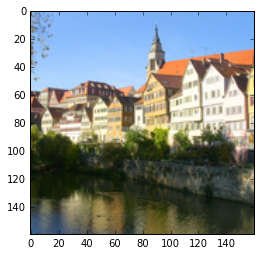

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

content_im = plt.imread('../input_image/tuebingen_neckarfront_160.png')
crop_content_im, photo = central_crop(content_im, IMAGE_W)
plt.imshow(crop_content_im)

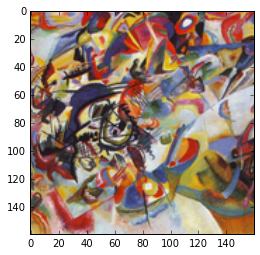

In [12]:
style_im = plt.imread('../input_image/comp_160.png')
crop_style_im, art = central_crop(style_im, IMAGE_W)
plt.imshow(crop_style_im)

In [13]:
from theano import shared

%time
content_outputs = {k:theano.shared(layer.get_output().eval({x:photo})) for k,layer in zip(Layers.keys(), Layers.values())}

CPU times: user 18 µs, sys: 4 µs, total: 22 µs
Wall time: 11 µs


In [14]:
style_outputs = {k:theano.shared(layer.get_output().eval({x:art})) for k,layer in zip(Layers.keys(), Layers.values())}

In [15]:
# define symbolic equation for white_image
white_outputs = {k:layer.output for k,layer in zip(Layers.keys(), Layers.values())}

In [16]:
def gram_matrix(x):
    x = x.flatten(ndim=3)
    g = T.tensordot(x, x, axes=([2], [2]))
    return g

def content_loss(RE, GT, layer):
    re = RE[layer]
    gt = GT[layer]
    
    loss = 1./2 * ((re - gt)**2).sum()
    return loss

def style_loss(RE, GT, layer):
    re = RE[layer]
    gt = GT[layer]
    
    R = gram_matrix(re)
    G = gram_matrix(gt)
    
    N = re.shape[1]
    M = re.shape[2] * re.shape[3]
    
    loss = 1./(4.0 * N**2 * M**2) * ((R - G)**2).sum()
    return loss

In [17]:
ALPHA = T.fscalar("ALPHA")
BETA  = T.fscalar("BETA")

# Define loss function
losses = []

# change here #####################################################################################################
# content loss
losses.append(ALPHA * content_loss(content_outputs, white_outputs, 2))

# style loss
losses.append(BETA * style_loss(style_outputs, white_outputs, 2))

total_loss = sum(losses)

In [18]:
# define updating function of white_image
white_im = theano.shared(np.random.uniform(low=0, high=1, size=(1,IMAGE_W*IMAGE_W*3)).astype(theano.config.floatX))

grads = T.grad(total_loss, layer0.input)

In [19]:
#(layer0.input.eval({x:white_im.get_value()}) == white_im.get_value().reshape(1,3,IMAGE_W,IMAGE_W)).all()

In [20]:
#(white_im.get_value() == layer0.input.eval({x:white_im.get_value()}).reshape(1,3*IMAGE_W*IMAGE_W)).all()

In [21]:
#layer0.input.eval({x:white_im.get_value()}).shape

In [22]:
#layer0.input.eval({x:white_im.get_value()})

In [23]:
# SGD
'''
learning_rate = T.fscalar('learning_rate')
updates = [ (white_im, white_im - learning_rate * grads.reshape(shape=(1,3*IMAGE_W*IMAGE_W))) ]
'''

"\nlearning_rate = T.fscalar('learning_rate')\nupdates = [ (white_im, white_im - learning_rate * grads.reshape(shape=(1,3*IMAGE_W*IMAGE_W))) ]\n"

In [24]:
# momentun
learning_rate = T.fscalar('learning_rate')

momentum = theano.shared(numpy.cast[theano.config.floatX](0.5), name='momentum')
updates = []

param_update = theano.shared(white_im.get_value()*numpy.cast[theano.config.floatX](0.))    
updates.append((white_im, white_im - learning_rate*param_update))
updates.append((param_update, momentum*param_update + (numpy.cast[theano.config.floatX](1.) - momentum)*(grads.reshape(shape=(1,3*IMAGE_W*IMAGE_W)))))

In [25]:
#numpy.cast[theano.config.floatX](0.)

In [26]:
train_model = theano.function(
    [learning_rate, ALPHA, BETA],
    [losses[0], losses[1], total_loss], 
    updates=updates,
    givens={
        x: white_im
    }
)

Reconstruct image 1
LOSS: 690.287898
Reconstruct image 2
LOSS: 690.287898
Reconstruct image 3
LOSS: 677.861001
Reconstruct image 4
LOSS: 659.753418
Reconstruct image 5


KeyboardInterrupt: 

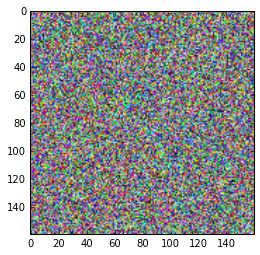

In [27]:
# change here #####################################################################################################
lr = 0.3
alpha = 1.0e-3 
beta = 1.0e+8 # fixed

# momentun
RECON_RESULT = {}
RECON_RESULT[0] = np.clip(white_im.get_value(), a_min=0.0, a_max=1.0)

# save original white noise image
plt.imshow(np.transpose(RECON_RESULT[0].reshape(3,IMAGE_W,IMAGE_W), (1,2,0)))
# change here #####################################################################################################
plt.savefig('../output_image/comp_Lay_2_LR_{0}_alpha_{1}_beta_{2}_iter_{3}.png'.format('%.1E'%lr, '%.1E'%alpha, '%.1E'%beta, 0))

pre_loss = numpy.inf

for i in range(480):
    print(("Reconstruct image %i") % (i+1))
    LOSS = train_model(learning_rate=lr, ALPHA=alpha, BETA=beta)
    print(("  Conte_Loss: %f") % (LOSS[0]))
    print(("  Style_Loss: %f") % (LOSS[1]))
    print(("  Total_Loss: %f") % (LOSS[2]))
    RECON_RESULT[i+1] = np.clip(white_im.get_value(), a_min=0.0, a_max=1.0)
    
    # regular saving
    if((i+1)%80 == 0):
        plt.imshow(np.transpose(RECON_RESULT[i+1].reshape(3,IMAGE_W,IMAGE_W), (1,2,0)))
        # change here #####################################################################################################
        plt.savefig('../output_image/comp_Lay_2_LR_{0}_alpha_{1}_beta_{2}_iter_{3}.png'.format('%.1E'%lr, '%.1E'%alpha, '%.1E'%beta, (i+1)))
    
    # pre_stopping
    if(abs(pre_loss - LOSS[2]) <= 1.0e-5 and i>10):
        plt.imshow(np.transpose(RECON_RESULT[i+1].reshape(3,IMAGE_W,IMAGE_W), (1,2,0)))
        # change here #####################################################################################################
        plt.savefig('../output_image/comp_Lay_2_LR_{0}_alpha_{1}_beta_{2}_iter_{3}.png'.format('%.1E'%lr, '%.1E'%alpha, '%.1E'%beta, (i+1)))
        break
        
    if(LOSS[2] < pre_loss):
        pre_loss = LOSS[2]

In [ ]:
'''
RECON_RESULT= {}
RECON_RESULT[0] = white_im.get_value()
# momentun
plt.imshow(np.transpose(RECON_RESULT[400].reshape(3,IMAGE_W,IMAGE_W), (1,2,0)))
plt.savefig('../output_image/van_alpha_{0}_beta_{1}_iter_{2}.png'.format('%.1E'%alpha, '%.1E'%beta, 0))
'''

In [ ]:
'''
# momentun
plt.imshow(np.transpose(RECON_RESULT[480].reshape(3,IMAGE_W,IMAGE_W), (1,2,0)))
'''